In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.datasets import load_claudius
from LoopStructural.visualisation import LavaVuModelViewer

import pandas as pd
import numpy as np

In [2]:
data, bb = load_claudius()
data = data.reset_index()

In [3]:
data.loc[792]

index            792
X             550552
Y        7.82183e+06
Z           -9166.32
val               60
type          strati
nx               NaN
ny               NaN
nz               NaN
Name: 792, dtype: object

We will use the claudius dataset and then add a flat lying stratigraphy above it

In [4]:
parameters = {}
parameters['model'] = {'bounding_box':bb.flatten().tolist()}
parameters['features'] = []


# # parameters.append()
parameters['features'].append({'feature_type':'foliation','type':'strati2','interpolatortype':'PLI',
                               'nelements':1e4,
                               'solver':'pyamg'})
parameters['features'].append({'feature_type':'foliation','type':'strati','interpolatortype':'PLI',
                               'nelements':1e4,
                               'solver':'pyamg'})
parameters['features'].append({'feature_type':'onlap_unconformity','type':'strati'})

In [5]:
parameters['features'][0].pop('feature_type')

'foliation'

In [6]:
ff = open('params.yml', 'w')
yaml.dump(parameters, ff)#, default_flow_style=False)
with open('params.json','w') as f:
    json.dump(parameters,f)

# yaml.dump(parameters)

NameError: name 'yaml' is not defined

In [7]:
for p in parameters:
        for k, i in p.items():
            print(k, i)

AttributeError: 'str' object has no attribute 'items'

In [8]:
with open('onlap.loop','w') as f:
    for p in parameters:
        for k, i in p.items():
            f.write('{} : {} \t'.format(k,i))
        f.write('\n')
        

AttributeError: 'str' object has no attribute 'items'

In [9]:
data.loc[792]

index            792
X             550552
Y        7.82183e+06
Z           -9166.32
val               60
type          strati
nx               NaN
ny               NaN
nz               NaN
Name: 792, dtype: object

In [10]:
data.loc[:,'val']*=-1
data.loc[:,['nx','ny','nz']]*=-1

In [11]:
data.loc[792,'type'] = 'strati2'
data.loc[792,['nx','ny','nz']] = [0,0,1]
data.loc[792,'val'] = 0

In [12]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)


In [13]:
strati2 = model.create_and_add_foliation('strati2',
                              interpolatortype='PLI',
                               nelements=1e4,
                               solver='pyamg'
                              )
uc = model.add_unconformity(strati2['feature'],1)

In [14]:
strati = model.create_and_add_foliation('strati',
                              interpolatortype='PLI',
                               nelements=1e4,
                               solver='pyamg'
                              )
# uc = model.add_onlap_unconformity(strati['feature'],-250)


In [20]:
stratigraphic_column = {}
stratigraphic_column['strati2'] = {}
stratigraphic_column['strati2']['unit1'] = {'min':1,'max':10,'id':0}
stratigraphic_column['strati'] = {}
stratigraphic_column['strati']['unit2'] = {'min':-60,'max':0,'id':1}
stratigraphic_column['strati']['unit3'] = {'min':-250,'max':-60,'id':2}
stratigraphic_column['strati']['unit4'] = {'min':-330,'max':-250,'id':3}
stratigraphic_column['strati']['unit5'] = {'min':-np.inf,'max':-330,'id':4}

model.set_stratigraphic_column(stratigraphic_column)

Isovalue doesn't exist inside bounding box
Isovalue doesn't exist inside bounding box



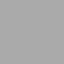

In [22]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(strati2['feature'],
#                       nslices=5
                      slices=[2,1.5,1],
                     )
viewer.add_isosurface(strati['feature'],
                      slices=[0,-60,-250,-330],
                     paint_with=strati['feature'])
viewer.add_model(cmap='tab20')
viewer.interactive()


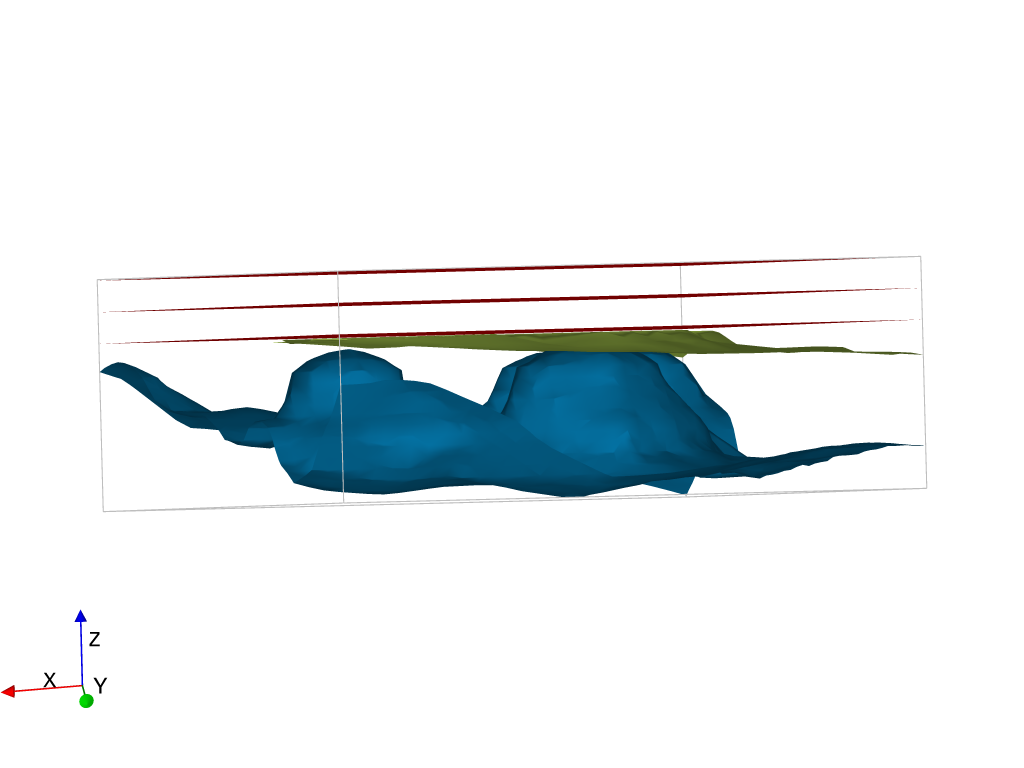

In [20]:
viewer.display()

In [38]:
dic = {}
def test(**kwargs):
    dic = {'tet':0,**kwargs}
    print(dic)

In [39]:
test(test1=1,test2=2)

{'tet': 0, 'test1': 1, 'test2': 2}
